<a href="https://colab.research.google.com/github/AlifJungjunanreal/-portfolio/blob/main/logistikregresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ujian Tengah Semester Sistem Cerdas
Logistic Regreseion
Anggota Kelompok


1.  Muhammad Alif Jungjunan 220102055
2.  Satrio Iqbal 220102079
3.  Riza Izzani 220102075





Data diambil dari kagle dengan link: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

In [3]:
from google.colab import files
uploaded = files.upload()


Saving x_test.csv to x_test.csv
Saving x_train.csv to x_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving smoking.csv to smoking.csv


import library


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [36]:

X_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv').iloc[:, 1].values.ravel()
X_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv').iloc[:, 1].values.ravel()


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (44553, 26)
y_train shape: (44553,)
X_test shape: (11139, 26)
y_test shape: (11139,)


cek distribusi table

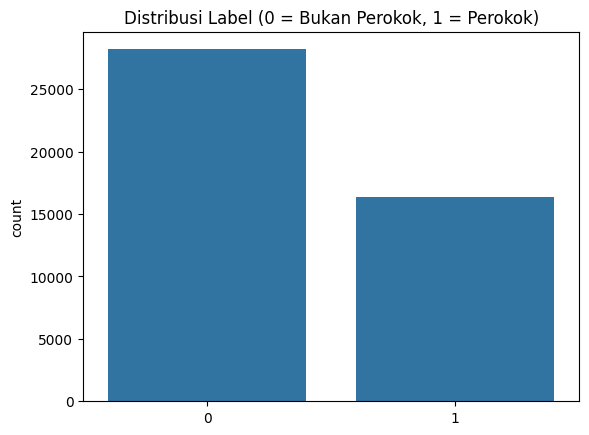

In [37]:
sns.countplot(x=y_train)
plt.title("Distribusi Label (0 = Bukan Perokok, 1 = Perokok)")
plt.show()


Memilih variable yang nantinya digunakan


In [38]:
selected_vars = ['Gtp', 'HDL', 'LDL', 'hemoglobin', 'systolic', 'relaxation',
                 'age', 'triglyceride', 'Urine protein', 'AST', 'ALT']

x_train_selected = X_train[selected_vars]
x_test_selected = X_test[selected_vars]


interpretasi koefisien



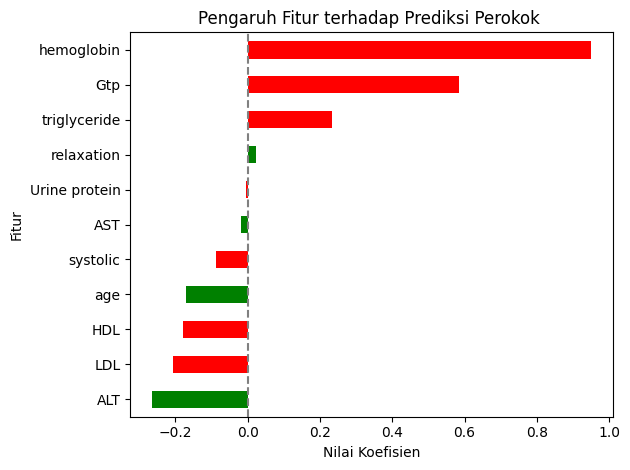

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_vars])
X_test_scaled = scaler.transform(X_test[selected_vars])

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)


coef_series = pd.Series(model.coef_[0], index=selected_vars)
coef_series.sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in coef_series])

plt.title("Pengaruh Fitur terhadap Prediksi Perokok ")
plt.xlabel("Nilai Koefisien")
plt.ylabel("Fitur")
plt.axvline(x=0, color='gray', linestyle='--')  # Garis vertikal di nol
plt.tight_layout()
plt.show()

melatih model


In [40]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train_selected, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

evaluasi model

Accuracy: 0.7172098033934824
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      7036
           1       0.59      0.76      0.66      4103

    accuracy                           0.72     11139
   macro avg       0.71      0.73      0.71     11139
weighted avg       0.74      0.72      0.72     11139



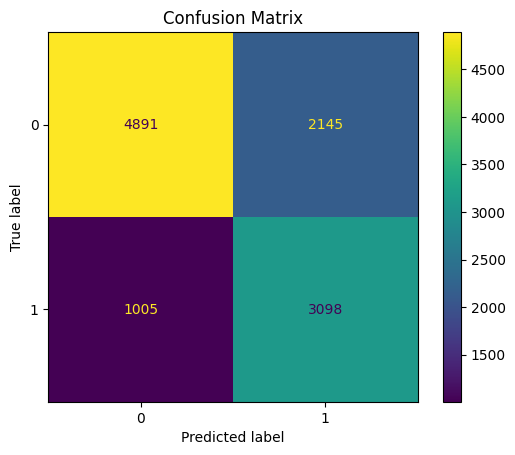

In [41]:
y_pred = model.predict(x_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()


ROC Curve dan AUC

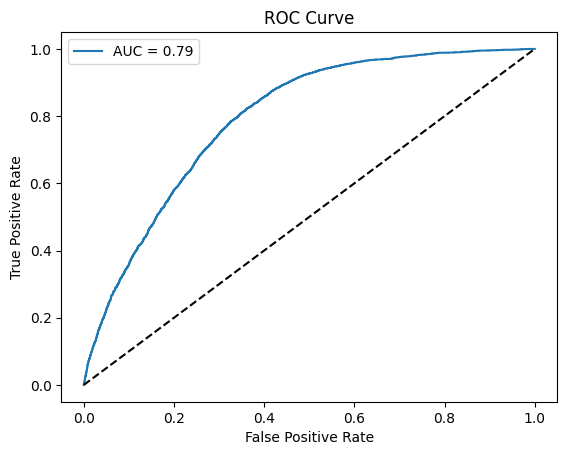

In [42]:
y_proba = model.predict_proba(x_test_selected)[:, 1]
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Simulasi Prediksi Data baru

In [49]:


sample = pd.DataFrame([{
    'Gtp': 80,
    'HDL': 35,
    'LDL': 160,
    'hemoglobin':80.0,
    'systolic': 145,
    'relaxation': 95,
    'age': 45,
    'triglyceride': 250,
    'Urine protein': 2,
    'AST': 50,
    'ALT': 60
}])

sample_ordered = sample[selected_vars]

sample_scaled_array = scaler.transform(sample_ordered)

sample_scaled_df = pd.DataFrame(sample_scaled_array, columns=selected_vars)


prediction = model.predict(sample_scaled_df)
print("Prediksi:", "Perokok" if prediction[0] == 1 else "Bukan perokok")

Prediksi: Perokok
